In [1]:
import sys
import os

# Get the absolute path to the project directory
project_dir = os.path.abspath("..")

# Append the project directory to sys.path
if project_dir not in sys.path:
    sys.path.append(project_dir)

In [2]:
import yfinance as yf
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import msgpack
import warnings
from dataclasses import asdict, is_dataclass, dataclass
import os
import msgpack
import json
import pickle
from pandas.api.types import is_datetime64_any_dtype

from src.common.AssetData import AssetData
from src.common.AssetDataService import AssetDataService
from src.common.AssetFileInOut import AssetFileInOut 
from src.databaseService.OutsourceLoader import OutsourceLoader
from src.stockGroupsService.Group_Over20Years import Group_Over20Years
from src.stockGroupsService.GroupsFoundation import GroupsFoundation


In [3]:
a = Group_Over20Years("src/database", "src/stockGroups")
outsourceLoader = OutsourceLoader(outsourceOperator="yfinance")
asset: AssetData = outsourceLoader.load(ticker="irm")
a.checkAsset(asset)

if not os.path.isfile(os.path.join("../src/stockGroups", "group_all.yaml")):
    raise FileNotFoundError("The file 'group_all.yaml' is not given.")

c:\Users\KILightTouch\Desktop\RandomOdyssey\.venv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [4]:
for subclass in GroupsFoundation.__subclasses__():
        subclassInstance = subclass("../src/database", "../src/stockGroups")
        subclassInstance.generateYaml()

In [9]:
os.path.join("src/stockGroups", "group_all.yaml")

'src/stockGroups\\group_all.yaml'

c:\Users\KILightTouch\Desktop\RandomOdyssey\.venv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                      ]c:\Users\KILightTouch\Desktop\RandomOdyssey\.venv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                      ]  2 of 503 completedc:\Users\KILightTouch\Desktop\RandomOdyssey\.venv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 

Strategy CAGR: -42.35%
Strategy Sharpe Ratio: -1.67


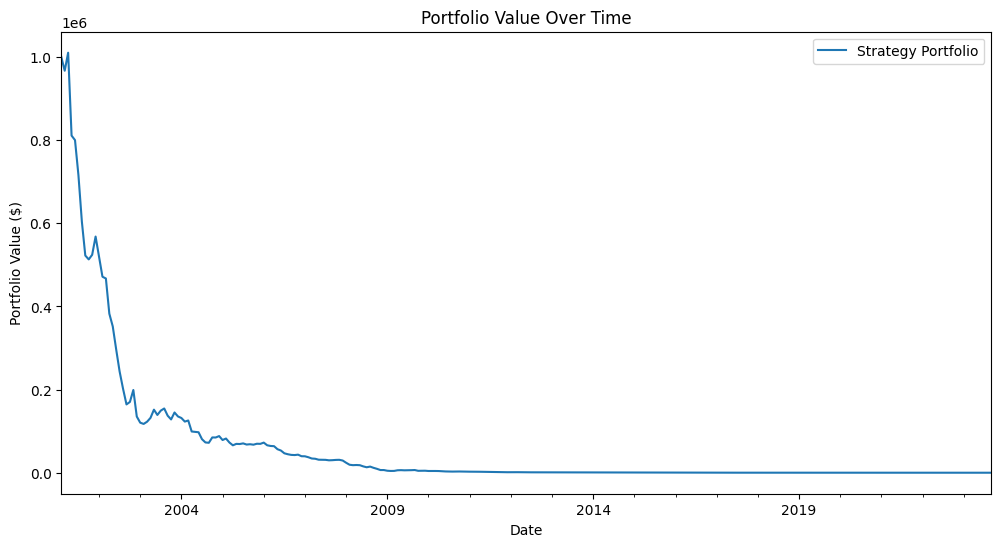

c:\Users\KILightTouch\Desktop\RandomOdyssey\.venv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\Users\KILightTouch\AppData\Local\Temp\ipykernel_10960\218762970.py:97: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  spy_monthly_prices = spy_data.resample('M').last()


SPY CAGR: 7.63%
SPY Sharpe Ratio: 0.56


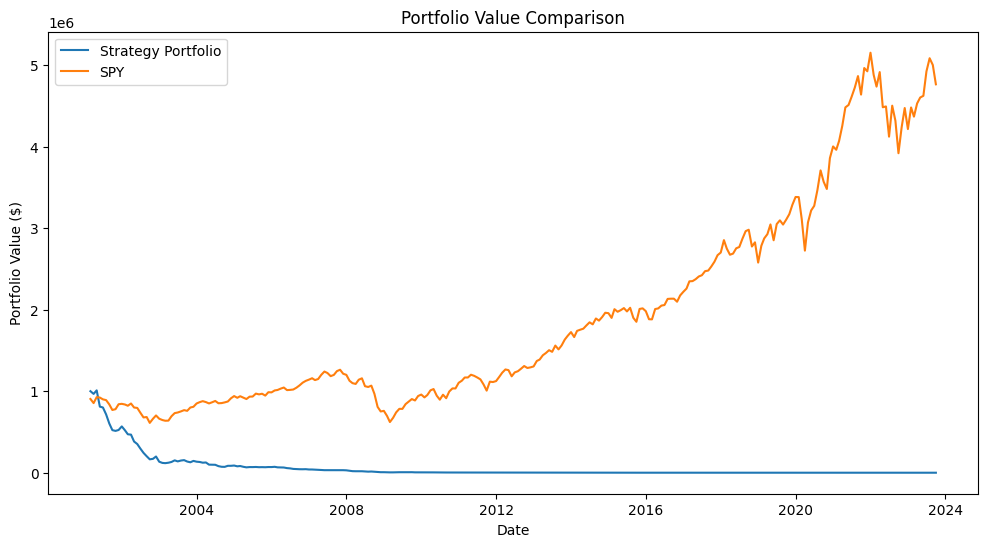

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Data Acquisition
# Get the list of S&P 500 companies from Wikipedia
sp500_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
table = pd.read_html(sp500_url)
sp500_tickers = table[0]['Symbol'].tolist()

# Adjust tickers with periods to use Yahoo Finance format
sp500_tickers = [ticker.replace('.', '-') for ticker in sp500_tickers]

# Define the time period for the backtest
start_date = '2001-01-01'
end_date = '2023-09-30'

# Download historical adjusted close prices
data = yf.download(sp500_tickers, start=start_date, end=end_date, interval='1d')['Adj Close']

# Step 2: Data Preprocessing
# Resample the data to month-end frequency
monthly_prices = data.resample('M').last()

# Calculate monthly returns
monthly_returns = monthly_prices.pct_change()

# Initialize variables for the backtest
initial_capital = 1000000
portfolio_value = pd.Series(index=monthly_returns.index, dtype='float64')
positions = pd.DataFrame(index=monthly_returns.index, columns=monthly_returns.columns).fillna(0)

# Start the portfolio with the initial capital
portfolio_value.iloc[1] = initial_capital  # Start from the second month

# Step 3: Strategy Implementation
# Loop through each month to implement the strategy
for i in range(2, len(monthly_returns)):
    date = monthly_returns.index[i]
    last_month_date = monthly_returns.index[i-1]
    
    # Get last month's returns and drop NaNs
    last_month_returns = monthly_returns.iloc[i-1].dropna()
    
    # Select the top 6 stocks based on last month's performance
    top_stocks = last_month_returns.sort_values(ascending=False).head(6).index.tolist()
    
    # Allocate equal weight to each selected stock
    weight = 1.0 / len(top_stocks)
    positions.loc[date, top_stocks] = weight
    
    # Get current month's returns for the selected stocks
    current_month_returns = monthly_returns.iloc[i][top_stocks].fillna(0)
    
    # Calculate the portfolio return for the current month
    portfolio_return = (weight * current_month_returns).sum()-0.06
    
    # Update the portfolio value
    portfolio_value.iloc[i] = portfolio_value.iloc[i-1] * (1 + portfolio_return)

# Step 4: Performance Evaluation
# Calculate cumulative returns and performance metrics
def calculate_cagr(portfolio_values):
    years = (portfolio_values.index[-1] - portfolio_values.index[0]).days / 365.25
    cagr = (portfolio_values.iloc[-1] / portfolio_values.iloc[0]) ** (1 / years) - 1
    return cagr

strategy_cagr = calculate_cagr(portfolio_value.dropna())

def calculate_annualized_sharpe_ratio(portfolio_returns, risk_free_rate=0):
    excess_returns = portfolio_returns - risk_free_rate / 12
    annualized_return = np.mean(excess_returns) * 12
    annualized_volatility = np.std(excess_returns) * np.sqrt(12)
    sharpe_ratio = annualized_return / annualized_volatility
    return sharpe_ratio

strategy_returns = portfolio_value.pct_change().dropna()
strategy_sharpe = calculate_annualized_sharpe_ratio(strategy_returns)

print(f"Strategy CAGR: {strategy_cagr:.2%}")
print(f"Strategy Sharpe Ratio: {strategy_sharpe:.2f}")

# Step 5: Visualization
# Plot the portfolio value over time
plt.figure(figsize=(12, 6))
portfolio_value.dropna().plot(label='Strategy Portfolio')
plt.title('Portfolio Value Over Time')
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Date')
plt.legend()
plt.show()

# Compare with SPY (S&P 500 ETF) performance
spy_data = yf.download('SPY', start=start_date, end=end_date, interval='1d')['Adj Close']
spy_monthly_prices = spy_data.resample('M').last()
spy_monthly_returns = spy_monthly_prices.pct_change()
spy_portfolio_value = initial_capital * (1 + spy_monthly_returns).cumprod()

spy_cagr = calculate_cagr(spy_portfolio_value.dropna())
spy_returns = spy_portfolio_value.pct_change().dropna()
spy_sharpe = calculate_annualized_sharpe_ratio(spy_returns)

print(f"SPY CAGR: {spy_cagr:.2%}")
print(f"SPY Sharpe Ratio: {spy_sharpe:.2f}")

# Plot both portfolio and SPY
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value.dropna(), label='Strategy Portfolio')
plt.plot(spy_portfolio_value.dropna(), label='SPY')
plt.title('Portfolio Value Comparison')
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Date')
plt.legend()
plt.show()
